In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

In [241]:
# Exercise 1.1
I0 = 1
S0 = 999
R0 = 0

beta = 0.3
gamma = 0.1
t = 200

def gillespies_sir(t, S0, I0, R0, beta, gamma):
    times = []
    S_list = []
    I_list = []
    R_list = []
    t0 = 0
    N = S0 + I0 + R0
    S = S0
    I = I0
    R = R0
    while t0 < t and I > 0:
        a_infect = beta * S * I / N
        a_recover = gamma * I
        a0 = a_infect + a_recover

        if a0 <= 0.0:
            break

        u1 = random.uniform(0, 1.0)
        dt = -math.log(u1) / a0
        t0 += dt
        if t0 > t:
            break

        u2 = random.uniform(0, 1.0)
        if u2 < (a_infect / a0):
            if S > 0:
                S -= 1
                I += 1
        else:
            if I > 0:
                I -= 1
                R += 1

        times.append(t0)
        S_list.append(S)
        I_list.append(I)
        R_list.append(R)

    return times, S_list, I_list, R_list



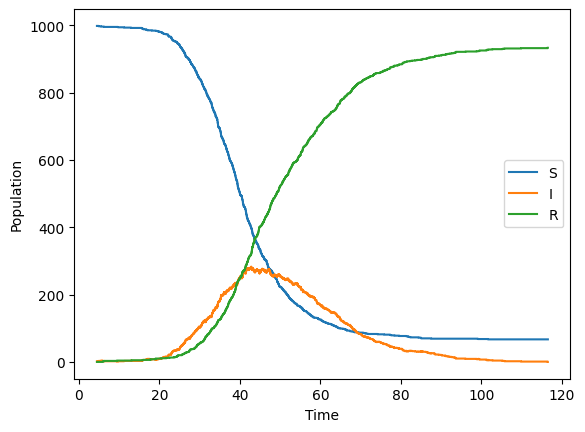

In [243]:
times, S_list, I_list, R_list = gillespies_sir(t, S0, I0, R0, beta, gamma)

plt.step(times, S_list, where='post', label='S')
plt.step(times, I_list, where='post', label='I')
plt.step(times, R_list, where='post', label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()